# 插值？

非线性曲线拟合时进行线性化：
1. 幂函数: $y = \alpha x^{\beta}$ `->` $\ln y = \beta(\ln x) + \ln \alpha$
2. 指数函数: $y = \alpha e^{\beta x}$ `->` $\ln y = \beta x + \ln \alpha$
3. 对数函数: $y = \ln (\beta x)$ `->` $e^y = \beta x$

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy import interpolate

from matplotlib import pyplot as plt
plt.style.use("solarized-light")

In [2]:
X_interp = np.linspace(0, 10, endpoint=True, num=11)
X_plot = np.linspace(0, 10, endpoint=True, num=41)
y = np.sin(X_interp ** 2 / 9.)

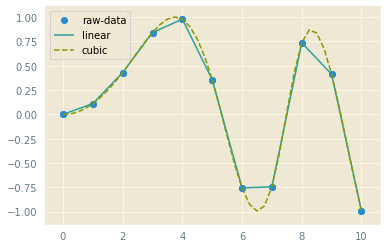

In [3]:
plt.plot(X_interp, y, "o")

interpolation_kinds = [
    ("linear", "-"),
    ("cubic", "--"),
    ]

plt.scatter(X_interp, y)

for interp_kind in interpolation_kinds:
    plt.plot(
        X_plot,
        scipy.interpolate.interp1d(X_interp, y, kind=interp_kind[0])(X_plot),
        interp_kind[1]
        )

plt.legend(["raw-data"] + [ interp_kind[0] for interp_kind in interpolation_kinds ], loc="best")

plt.show()

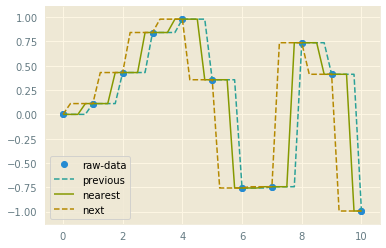

In [4]:
plt.plot(X_interp, y, "o")

interpolation_kinds = [
    ("previous", "--"),
    ("nearest", "-"),
    ("next", "--"),
    ]

plt.scatter(X_interp, y)

for interp_kind in interpolation_kinds:
    plt.plot(
        X_plot,
        scipy.interpolate.interp1d(X_interp, y, kind=interp_kind[0])(X_plot),
        interp_kind[1]
        )

plt.legend(["raw-data"] + [ interp_kind[0] for interp_kind in interpolation_kinds ], loc="best")

plt.show()

## 牛顿插值

插值的分类
* 线性插值 (线性空间中两点决定一条直线)
* Newton 插值方法
  * Gregory([格雷戈里](https://baike.baidu.com/item/格雷戈里/33552))-Newton 公式
* Taylor 公式插值
  * 如若 $f(x)$ 在点 $x = x_0$ 处具有任意阶连续导数，则可以近似为幂级数
    $$ f(x) = f(x_0) + f^{(1)}(x_0) \cdot (x - x_0) + \frac{f^{(2)}(x_0)}2 (x - x_0)^2 + \frac{f^{(3)}(x_0)}{3!} (x - x_0)^3 + \cdots = \sum_{m = 0}^{\infty} \frac{f^{(m)}}{m!} (x - x_0)^m $$
* placeholder

$ x^{(2)} + x = 0 $ 的
基础解系为 $ x_1 = \cos t, x_2 = \sin t $ ，
通解为 $ x = C_1 \cos t + C_2 \sin t $ ，

已知有解 $ x_1 = \cos t $ ，利用Liouville公式验证通解为 $ x = C_1 \cos t + C_2 \sin t $ 。

證:
令 $ t_0 = 0, a_1(s) = 0 $
$$ \therefore x = \cos t [ C_1 + \int_0^t \frac{\mathrm{d} t}{\cos^2 t} + C_2 ] $$
$$ = \cos t [C_1(\tan t + C_3) + C_2] $$
$$ = C_1 \sin t + (C_1 C_3 + C_2) \cos t $$

故得证

根据题意, 每个工地位置坐标 $ \{(x_k, y_k)\}_{k=1}^6 $ ，则临时料场 A B 到每个工地的距离可表示为
$$ d_{A,k} = \sqrt{(5 - x_k)^2 + (1 - y_k)^2} $$
$$ d_{B,k} = \sqrt{(2 - x_k)^2 + (7 - y_k)^2} $$
根据题意, 每个工地的需求量为 $ \{d_k\}_{k=1}^6 $
得到目标式
$$ \min_{} \sum_{k=1}^6 {a_k * d_{A,k} + b_k * d_{B,k}} $$
$$ \mathrm{s.t.} a_k + b_k = d_k, k = 1, ... 6 $$
其中， $ a_k, b_k $ 为需要确定的由两个料场向六个工地运输原料的量